In [1]:
from google.colab import files

# Upload the zip file
print("Please upload the dataset zip file:")
uploaded = files.upload()


Please upload the dataset zip file:


Saving archive.zip to archive.zip


In [2]:
import zipfile
import os

# Extract the uploaded zip file
zip_file_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()

# List the extracted files
extracted_files = os.listdir()
print(extracted_files)


['.config', 'boston.csv', 'archive.zip', 'sample_data']


In [4]:
import pandas as pd

# Load the train dataset
train_data = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Explore the train dataset
print(train_data.head())
print(train_data.info())
print(train_data.describe())

# Load the test dataset
test_data = pd.read_csv('/content/sample_data/mnist_test.csv')

# Explore the test dataset
print(test_data.head())
print(test_data.info())
print(test_data.describe())


   6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.584  0.585  0.586  0.587  0.588  0.589  0.590  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB
None
                  6        0      0.1  

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify columns with missing values
missing_values_columns = train_data.columns[train_data.isnull().any()]
print(f"Columns with missing values: {missing_values_columns}")

# Imputer to fill missing values with the mean
# Only apply imputation if there are missing values
if missing_values_columns.size > 0:  # Check if there are any missing value columns
    imputer = SimpleImputer(strategy='mean')
    train_data[missing_values_columns] = imputer.fit_transform(train_data[missing_values_columns])

# Verify if there are still any missing values
print(train_data.isnull().sum())

# Assuming the first column is the target variable
target_column = train_data.columns[0]
print(f"Target column: {target_column}")

# Split features and target variable
X = train_data.drop(columns=[target_column])
y = train_data[target_column]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Preprocessing completed successfully.")

Columns with missing values: Index([], dtype='object')
6        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.586    0
0.587    0
0.588    0
0.589    0
0.590    0
Length: 785, dtype: int64
Target column: 6
Preprocessing completed successfully.


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 15999
Testing set size: 4000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 16848242688.95919
Mean Squared Error: 3.674041228474573e+23
R-squared: -4.415641083407055e+22


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Linear Regression Metrics:
Mean Absolute Error: 16848242688.95919
Mean Squared Error: 3.674041228474573e+23
R-squared: -4.415641083407055e+22


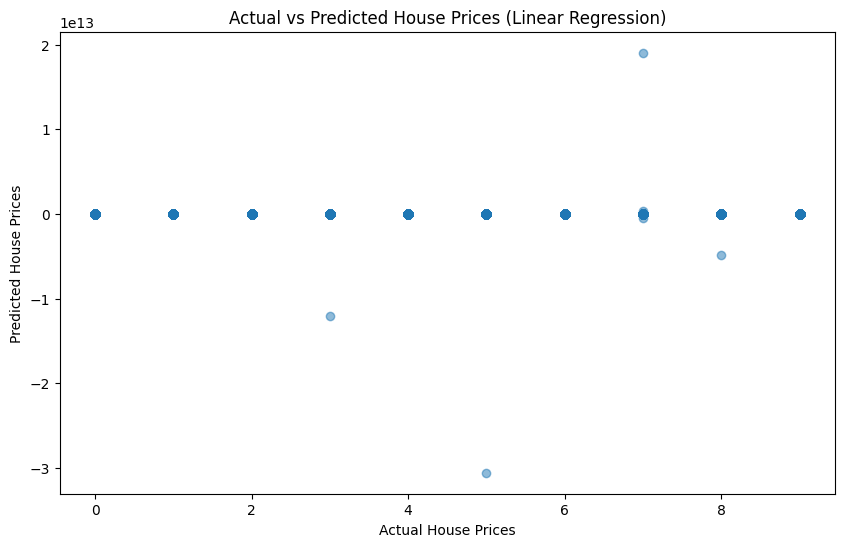

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices (Linear Regression)')
plt.show()

# For Decision Tree or Random Forest, visualize feature importance
if isinstance(model, (DecisionTreeRegressor, RandomForestRegressor)):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.show()